<a href="https://colab.research.google.com/github/sidhu2690/Torch_Notes/blob/main/01_torch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [192]:
torch.manual_seed(42)

x = np.arange(1, 1000)
y = 2 * x + 10

In [193]:
X = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

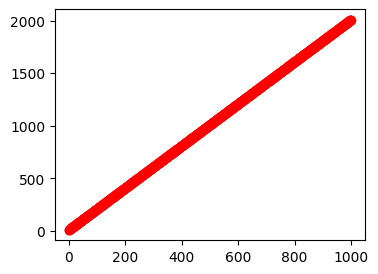

In [194]:
plt.figure(figsize=(4, 3))
plt.scatter(X.numpy(), y.numpy(), color='red')
plt.show()

# Model

In [195]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.w = nn.Parameter(torch.randn(1, dtype = torch.float32))
    self.b = nn.Parameter(torch.randn(1, dtype = torch.float32))

  def forward(self, x):
    return self.w * x + self.b

In [196]:
model = Model()

In [197]:
model.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

In [198]:
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.0001)
criterion = nn.L1Loss()
epochs = 100

In [199]:
model(X).shape, y.shape

(torch.Size([999]), torch.Size([999]))

In [200]:
for epoch in range(epochs):
  model.train()
  y_pred = model(X)
  loss = criterion(y_pred, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    print(f" Epoch: {epoch} | Loss: {loss}")

 Epoch: 0 | Loss: 841.5260009765625
 Epoch: 20 | Loss: 341.5240783691406
 Epoch: 40 | Loss: 18.468673706054688
 Epoch: 60 | Loss: 16.626623153686523
 Epoch: 80 | Loss: 14.564393997192383


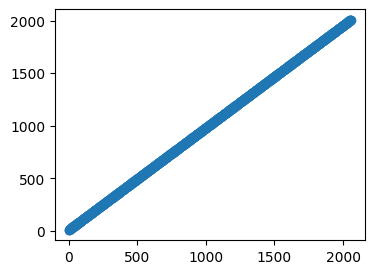

In [201]:
# Check result

model.eval()
with torch.inference_mode():
  y_predicted = model(X)

plt.figure(figsize=(4, 3))
plt.scatter(y_predicted, y)
plt.show()